# 2. Filtros Pasa Bajas Tipo Butterworth  (FPBB)

**Definición**

Sea $H(j\omega)$ la función de transferencia de un FPBB es
$$H(j\omega) = \dfrac{1}{\sqrt{ 1+\left(\dfrac{\omega}{\omega_c} \right)^{2n}} }$$

donde $n$ es el orden del filtro

La localización de los polos de dicha función se ubican en 
$$s=\omega_cexp\left( j\dfrac{\pi}{2n}(2k+n-1) \right)$$

In [1]:
#NOTE importar bibliotecas
import numpy             as np
import matplotlib.pyplot as plt

from scipy import signal

In [4]:
n  = 2.
wc = 1
k  = np.arange(1,2*n+1)
d  = 1j*np.pi/(2*n)
s  = wc*np.exp( d*(2*k + n - 1 ) )

for r,i in zip( np.absolute(s), np.angle(s)/np.pi ):
    print '%2.2f/_%2.4fpi'%(r,i)

1.00/_0.7500pi
1.00/_-0.7500pi
1.00/_-0.2500pi
1.00/_0.2500pi


### Gráfica distribución de polos

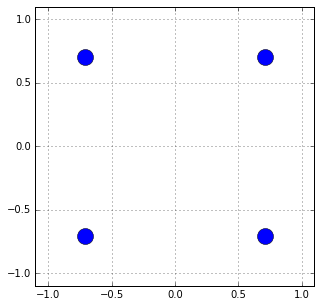

In [5]:
re, im = np.real( s ), np.imag( s )

plt.figure(figsize=(5,5))
plt.plot(re,im,'o',markersize=16)
plt.grid(True)
plt.xlim(-wc-0.1,wc+0.1)
plt.ylim(-wc-0.1,wc+0.1)
plt.show()

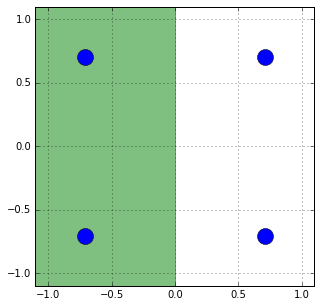

In [6]:
plt.figure(figsize=(5,5))
plt.plot(re,im,'ob',markersize=16)
plt.grid(True)
plt.axvspan(-wc-0.1,0,color='g',alpha=.5)
plt.xlim(-wc-0.1,wc+0.1)
plt.ylim(-wc-0.1,wc+0.1)
plt.show()

### Cálculo de función de transferencia

In [7]:
K = np.ceil( s.shape[0]/4. ).astype('int')

if n%2!=0:
    K -= 1 

A = np.absolute( s[:K] )
O = np.angle   ( s[:K] )
E = -2*np.cos( O )

p = [ [0, 0, 1] ]
for i,(a,e) in enumerate( zip( A,E ) ):
    print "%d: s^2 + %2.4f(%2.2f)s + %2.4f"%(i+1,e,a,a**2)
    p.append( [1,e*a,a**2] )


1: s^2 + 1.4142(1.00)s + 1.0000


In [8]:
print p
x = np.poly1d( p[0] )
for i in p[1:]:
    x *= np.poly1d( i )

print x

[[0, 0, 1], [1, 1.4142135623730949, 1.0]]
   2
1 x + 1.414 x + 1


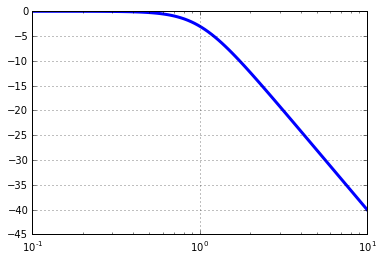

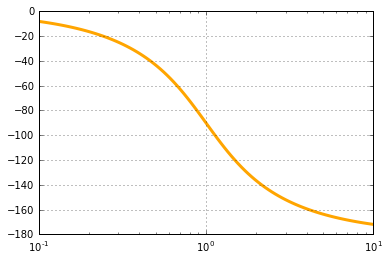

In [9]:
sy = signal.lti([1], x)

w, mag, phase = signal.bode(sy)

plt.figure()
plt.semilogx(w, mag,linewidth=3)
plt.grid(True)

plt.figure()
plt.semilogx(w, phase, linewidth=3, color='orange')
plt.grid(True)
plt.show()